In [1]:
import models.regress as rgr

prs = rgr.regress_an(DA[1], DA[0], opts=opts1, model = 'analytical_EqMP', 
                     Nx=1000, step = [0.1, 0.1], init_guess = None)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\vladysls\Anaconda3\envs\models\lib\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\vladysls\AppData\Local\Temp/ipykernel_8452/3621531612.py", line 3, in <module>
    prs = rgr.regress_an(DA[1], DA[0], opts=opts1, model = 'analytical_EqMP',
NameError: name 'DA' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\vladysls\Anaconda3\envs\models\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\vladysls\Anaconda3\envs\models\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return

TypeError: object of type 'NoneType' has no len()

In [1]:
import models.Ansol_dless as andl
# pars = [1000, 100, 0, 0, 0, 0, 1e-3]
# pars1 = [0.425, 100]
# pars = [10, 50, 1000]


opts1 = [35793650.79*1.75e-6/2, 0.4, 0.4]
opts = [1.75e-6/2/5.5, 2*1e-9]

# DA = andl.pulse(pars=pars, opts=opts, model='analytical_DAMP', T=4, dt=0.004, Nx=1000,
#                  inversion = 'ILap')
# Eq = andl.pulse(pars=pars1, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000,
#                  inversion = 'ILap')

In [92]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

ka = -2
KH_lim = [10, -10]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 51)
alpha_lim = [-10, 10]
alpha_sim = np.linspace(alpha_lim[0], alpha_lim[1], 51) 

T = 10
dt = 0.01

dFldpar = np.zeros((len(KH_sim), len(alpha_sim)))
dFldKHs = np.zeros((len(KH_sim), len(alpha_sim)))
dFldalphas = np.zeros((len(KH_sim), len(alpha_sim)))
Flows = np.zeros((len(KH_sim), len(alpha_sim), int(round(T/float(dt)))+1))
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):
#         k_ent = (10**ka)/(10**(3))
#         k_ext = k_ent/(10**i)
#         pars = [10**ka, (10**ka)/(10**(-1)), k_ent, k_ext, 0, 0, (10**j)]
        pars = [10**ka, 10**ka/10**i, 10**j]/
        pars = [10**i, 10**j]
        Flows[n, m] = andl.pulse(pars=pars, opts=opts1, model='analytical_Eq', T=T, dt=dt, Nx=1000, inversion = 'ILap')[1]
        clear_output(wait=True)
        print('Progress: ' + str(round((n*len(alpha_sim)+m+1)/(len(KH_sim)*len(alpha_sim))*100,2)) + ' %')
        
dlogKH = KH_sim[1] - KH_sim[0]       
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):        
        if n != 0 and n != len(KH_sim)-1:
            if m != 0 and m != len(alpha_sim)-1:
                
#                 pars01 = np.exp([KH_sim[n-1], alpha_sim[m]])
#                 Fl01 = andl.pulse(pars=pars01, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 pars02 = np.exp([KH_sim[n+1], alpha_sim[m]])
#                 Fl02 = andl.pulse(pars=pars02, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
                dFldKH = np.sum(abs(Flows[n+1, m]-Flows[n-1, m]))/abs((KH_sim[n+1] - KH_sim[n-1]))
                
#                 pars03 = np.exp([KH_sim[n], alpha_sim[m+1]])
#                 Fl03 = andl.pulse(pars=pars03, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 pars04 = np.exp([KH_sim[n], alpha_sim[m+1]])
#                 Fl04 = andl.pulse(pars=pars04, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
                dFldalpha = np.sum(abs(Flows[n, m+1]-Flows[n, m-1]))/abs((alpha_sim[m+1] - alpha_sim[m-1]))
                
                dFldpar[n, m] = (dFldKH + dFldalpha)/2
                dFldKHs[n, m] = dFldKH
                dFldalphas[n, m] = dFldalpha
#             else:
#                 pars11 = np.exp([KH_sim[n-1], alpha_sim[m]])
#                 Fl11 = andl.pulse(pars=pars11, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 pars12 = np.exp([KH_sim[n+1], alpha_sim[m]])
#                 Fl12 = andl.pulse(pars=pars12, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]
                
#                 dFldKH = np.sum(abs(Fl12-Fl11))/(KH_sim[n+1] - KH_sim[n-1])
                
#                 dFldpar[n, m] = dFldKH
#         else:
#             if m != 0 and m != len(alpha_sim)-1:
#                 pars21 = np.exp([KH_sim[n], alpha_sim[m-1]])
#                 Fl21 = andl.pulse(pars=pars21, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]

#                 pars22 = np.exp([KH_sim[n], alpha_sim[m+1]])
#                 Fl22 = andl.pulse(pars=pars22, opts=opts1, model='analytical_EqMP', T=4, dt=0.004, Nx=1000, inversion = 'ILap')[1]

#                 dFldalpha = np.sum(abs(Fl22-Fl21))/(alpha_sim[m+1] - alpha_sim[m-1])

#             dFldpar[n, m] = dFldalpha
df = pd.DataFrame(dFldpar[1:-1, 1:-1], index=KH_sim[1:-1], columns = alpha_sim[1:-1])

Progress: 100.0 %


In [63]:
# df = pd.DataFrame(dFldpar[1:-1, 1:-1], index=KH_sim[1:-1], columns = alpha_sim[1:-1])
# df.to_csv('saved/1ZDAMP_ka2_sens_m10p10.csv')

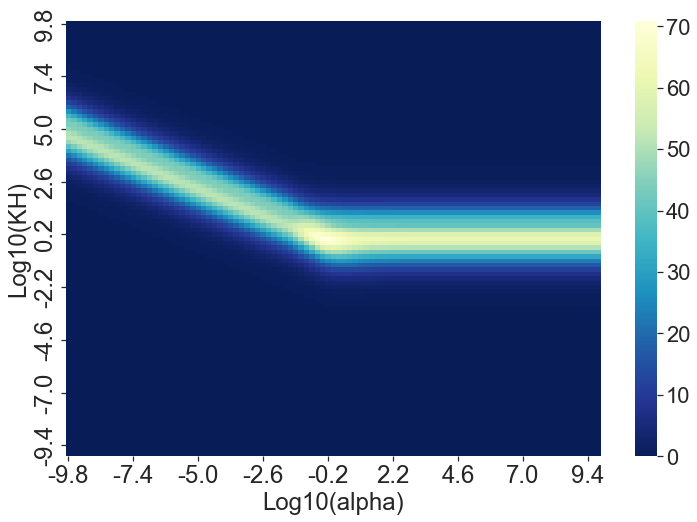

In [154]:
%matplotlib notebook
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt 
# df = pd.DataFrame(dFldKHs[1:-1, 1:-1], index=np.around(KH_sim[1:-1],2), columns = np.around(alpha_sim[1:-1],2))
df = pd.read_csv('saved/1ZDAMP_ka1_sens_kent4_KP_alpha_m10p10.csv', skiprows = None)
df = df.set_index('Unnamed: 0')
# df = np.log10(df)
arr = []
for i in df.columns:
    arr.append(round(float(i),2))
arr1 = []
for i in df.index:
    arr1.append(round(float(i),2))    
df.columns = arr
df.index = arr1
# df.
# df1 = df.iloc[24:76, 24:76]
# df = df.fillna(0)
# df = pd.DataFrame(dFldpar, index=KH_sim, columns = alpha_sim)
# Default heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.0)
plt.tick_params(labelsize=24, left = True, bottom = True, direction = 'out', length = 5)
sns.heatmap(df, cmap="YlGnBu_r", xticklabels = 12, yticklabels = 12)
plt.xlabel("Log10(alpha)") 
plt.ylabel("Log10(KH)")  
plt.show()

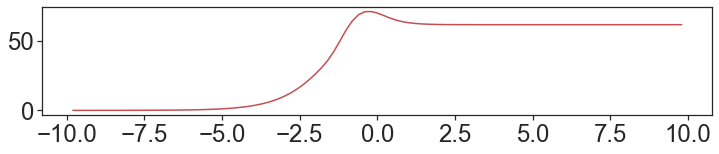

In [158]:
from scipy.signal import savgol_filter
plt.figure(figsize=(12, 2))
sns.set(font_scale=2.5)
sns.set_style(style='white')
df.columns[49]
# df.iloc[49,:]
# print(df.index[54])
# df.index[::-1]
plt.tick_params(labelsize=24, left = True, bottom = True, direction = 'out', length = 5)
plt.plot(df.index[::-1], df.iloc[49,:], 'r-')

In [27]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

ka = 5
KH_lim = [-5, 5]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 101)
alpha_lim = [-5, 5]
alpha_sim = np.linspace(alpha_lim[0], alpha_lim[1], 101) 

T = 4
dt = 0.004

dispers = np.zeros((len(KH_sim), len(alpha_sim)))
mean_rt = np.zeros((len(KH_sim), len(alpha_sim)))
peaktimes = np.zeros((len(KH_sim), len(alpha_sim)))
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):
        pars = [10**i, 10**j]
        sens_coeff = andl.sens_pars(pars=pars, opts=opts1, model='analytical_EqMP', T=T, dt=dt, Nx=1000)
        mean_rt[n, m] = sens_coeff[0]
        peaktimes[n, m] = sens_coeff[1]
        dispers[n, m] = sens_coeff[2]
        clear_output(wait=True)
        print('Progress: ' + str(round((n*len(alpha_sim)+m+1)/(len(KH_sim)*len(alpha_sim))*100,2)) + ' %')
        


Progress: 100.0 %


In [45]:
mrt = mean_rt.copy()
pt = peaktimes.copy()
disp = dispers.copy()
mrt[mrt == 0] = 1e-4
pt[pt == 0] = 1e-4
disp[disp == 0] = 1e-4

In [63]:
df1 = pd.DataFrame(np.log10(mrt), index=np.round(KH_sim,2), columns = np.round(alpha_sim,2))
df2 = pd.DataFrame(np.log10(pt), index=np.round(KH_sim,2), columns = np.round(alpha_sim,2))
df3 = pd.DataFrame(np.log10(disp), index=np.round(KH_sim,2), columns = np.round(alpha_sim,2))

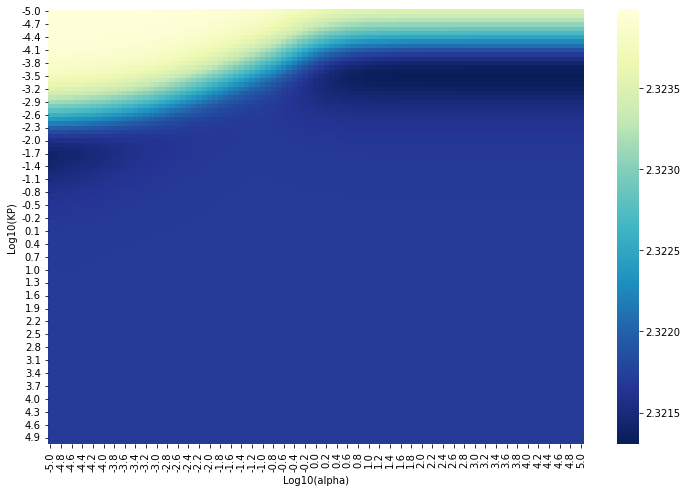

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt 
# df = pd.DataFrame(dFldpar[1:-1, 1:-1], index=np.around(KH_sim[1:-1],2), columns = np.around(alpha_sim[1:-1],2))
# df = df.fillna(0)
# df = pd.DataFrame(dFldpar, index=KH_sim, columns = alpha_sim)
# Default heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df3, cmap="YlGnBu_r")
plt.xlabel("Log10(alpha)") 
plt.ylabel("Log10(KP)") 
plt.show()

In [44]:
import numpy as np
import pandas as pd
from IPython.display import clear_output

ka = -2
KH_lim = [-5, 5]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 101)
alpha_lim = [-5, 5]
alpha_sim = np.linspace(alpha_lim[0], alpha_lim[1], 101) 

T = 4
dt = 0.004

dispers = np.zeros((len(KH_sim), len(alpha_sim)))
mean_rt = np.zeros((len(KH_sim), len(alpha_sim)))
peaktimes = np.zeros((len(KH_sim), len(alpha_sim)))
for n, i in enumerate(KH_sim):
    for m, j in enumerate(alpha_sim):
        pars = [10**ka, 10**ka/(10**i), 10**j]
        sens_coeff = andl.sens_pars(pars=pars, opts=opts, model='analytical_DAMP', T=T, dt=dt, Nx=1000)
        mean_rt[n, m] = sens_coeff[0]
        peaktimes[n, m] = sens_coeff[1]
        dispers[n, m] = sens_coeff[2]
        clear_output(wait=True)
        print('Progress: ' + str(round((n*len(alpha_sim)+m+1)/(len(KH_sim)*len(alpha_sim))*100,2)) + ' %')
        


Progress: 100.0 %


In [3]:
import models.regress as rgr
import models.Ansol_dless as andl

import numpy as np
import pandas as pd
from IPython.display import clear_output

opts1 = [35793650.79*1.75e-6/2, 0.4, 0.4]
opts = [1.75e-6/2/5.5, 2*1e-9]

ka_lim = [-5, 5]
ka_sim = np.linspace(ka_lim[0], ka_lim[1], 51)
KH_lim = [-5, 5]
KH_sim = np.linspace(KH_lim[0], KH_lim[1], 51) 

T = 10
dt = 0.01

Error = np.zeros((len(ka_sim), len(KH_sim)))
# Flows = np.zeros((len(ka_sim), len(kd_sim), int(round(T/float(dt)))+1))

ka = 10
kd = 100
for n, i in enumerate(ka_sim):
    for m, j in enumerate(KH_sim):
        pars = [ka, kd, 10**i, 10**i/10**j, 10**(0)]
        T = 10
        dt = 0.01
        DAint = andl.pulse(pars=pars, opts=opts, model='analytical_DAMPint', T=T, dt=dt, Nx=1000, inversion = 'ILap')
        flow, time = DAint[1], DAint[0]
        prs = rgr.regress_an(flow, time, opts=opts, model = 'analytical_DAMP', 
                     Nx=1000, step = [0.01, 0.01, 0.01], init_guess = None)
        
        DA = andl.pulse(pars=np.power(10, prs), opts=opts, model='analytical_DAMP', T=T, dt=dt, Nx=1000,
                 inversion = 'ILap')
        err = np.sum(abs(DA[1]-DAint[1]))/len(DA[1])
        Error[n, m] = err
        clear_output(wait=True)
        print(prs, err)
        print('Progress: ' + str(round((n*len(KH_sim)+m+1)/(len(ka_sim)*len(KH_sim))*100,2)) + ' %')

[ 0.99849646 -1.119799   -0.6587004 ] 2.6767420187986994e-05
Progress: 100.0 %


In [4]:
np.save('saved/1ZDAMP_vs_1ZDAMPint_kaKH_Dp0_regress_error_m5p5m5p5.npy', Error)

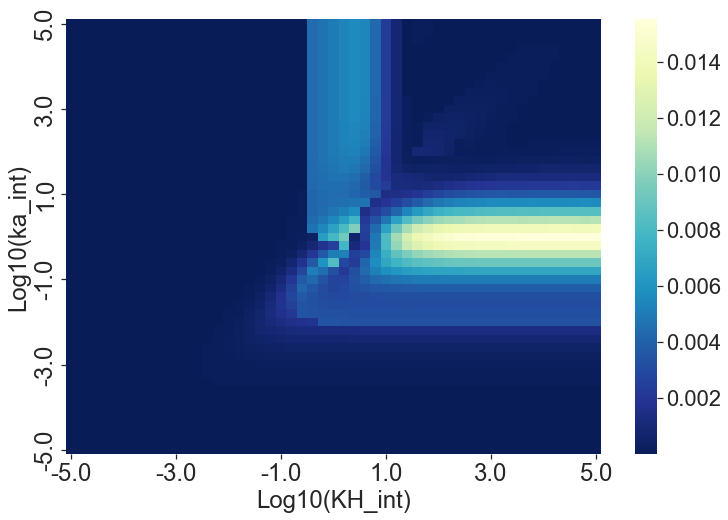

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt 
import models.regress as rgr
import models.Ansol_dless as andl
import numpy as np
import pandas as pd
ka_lim = [-5, 5]
ka_sim = np.linspace(ka_lim[0], ka_lim[1], 51)
kd_lim = [-5, 5]
kd_sim = np.linspace(kd_lim[0], kd_lim[1], 51)

%matplotlib notebook
%matplotlib inline
Error = np.load('saved/1ZDAMP_vs_1ZDAMPint_kaKH_Dp0_regress_error_m5p5m5p5.npy')
df = pd.DataFrame(Error, index=np.around(ka_sim,2), columns = np.around(kd_sim,2)).sort_index(ascending=False)
# dft = pd.DataFrame(dTdKhdalpha[1:-1, 1:-1], index=meant.index[1:-1], columns = meant.columns[1:-1])
# df = df.fillna(0)
# df = pd.DataFrame(dFldpar, index=KH_sim, columns = alpha_sim)
# Default heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.0)
plt.tick_params(labelsize=24, left = True, bottom = True, direction = 'out', length = 5)
sns.heatmap(df, cmap="YlGnBu_r", xticklabels = 10, yticklabels = 10)
plt.xlabel("Log10(KH_int)")
plt.ylabel("Log10(ka_int)") 
plt.show()

In [71]:
35793650.79*1.75e-6/2/0.6

52.19907406875

In [73]:
1.75e-6/2/5.5/(2*1e-9)

79.54545454545455

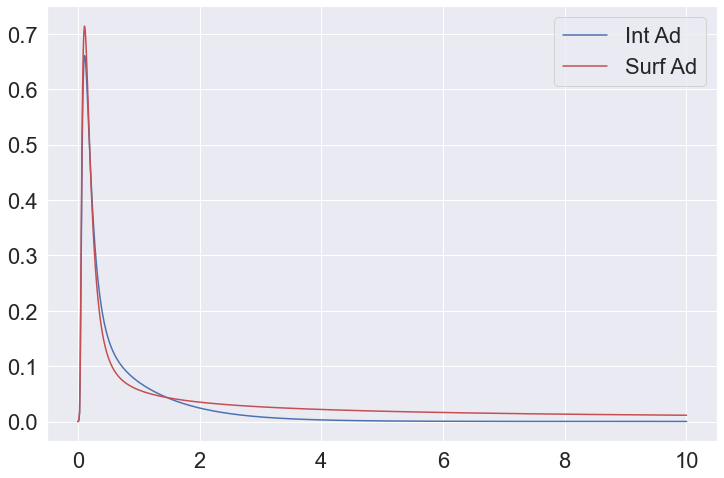

In [11]:
pars = [10, 100, 10**0, 10**0/10**3, 10**(0)]
DAint = andl.pulse(pars=pars, opts=opts, model='analytical_DAMPint', T=T, dt=dt, Nx=1000, inversion = 'ILap')
flow, time = DAint[1], DAint[0]
prs = rgr.regress_an(flow, time, opts=opts, model = 'analytical_DAMP', 
             Nx=1000, step = [0.01, 0.01, 0.01], init_guess = None)
DA = andl.pulse(pars=np.power(10, prs), opts=opts, model='analytical_DAMP', T=T, dt=dt, Nx=1000,
         inversion = 'ILap')


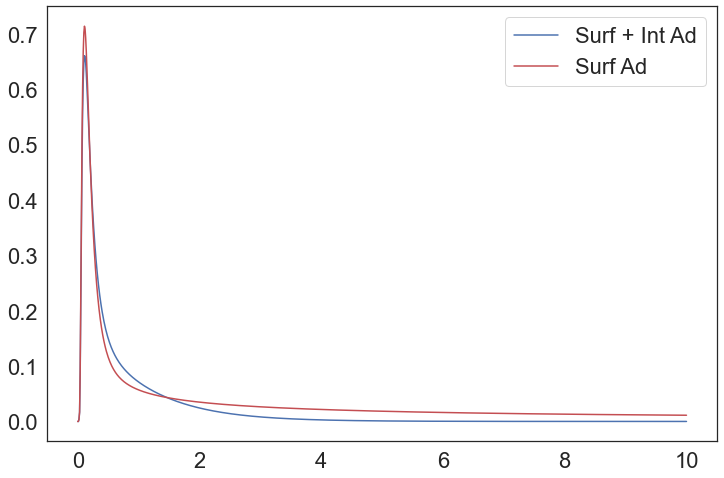

In [13]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=2.0)
sns.set_style(style='white')
plt.plot(DAint[0], DAint[1], 'b-', label = 'Surf + Int Ad')
plt.plot(DA[0], DA[1], 'r-', label = 'Surf Ad')
plt.legend()
plt.show()